In [1]:
# import lib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# df dari kaggle yg john hopkins
gCovK1 = pd.read_csv(r"data/1. covid global/kaggle 1/covid_19_data.csv")

In [2]:
# gCovK1.info()
# gCovK1[gCovK1['Province/State'].isna()]
# datanya bersih banget, kecuali di bbrp ad province/state yg kosong, 2 versi
# cleaning nan values
gCovK1v2 = gCovK1.dropna()
print(gCovK1)
gCovK1v2


           SNo ObservationDate     Province/State  Country/Region  \
0            1      01/22/2020              Anhui  Mainland China   
1            2      01/22/2020            Beijing  Mainland China   
2            3      01/22/2020          Chongqing  Mainland China   
3            4      01/22/2020             Fujian  Mainland China   
4            5      01/22/2020              Gansu  Mainland China   
...        ...             ...                ...             ...   
306424  306425      05/29/2021  Zaporizhia Oblast         Ukraine   
306425  306426      05/29/2021            Zeeland     Netherlands   
306426  306427      05/29/2021           Zhejiang  Mainland China   
306427  306428      05/29/2021    Zhytomyr Oblast         Ukraine   
306428  306429      05/29/2021       Zuid-Holland     Netherlands   

                Last Update  Confirmed  Deaths  Recovered  
0           1/22/2020 17:00        1.0     0.0        0.0  
1           1/22/2020 17:00       14.0     0.0     

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [3]:
# ver g dibersihin
# ngubah tipe data dr float -> int
gCovK1 = gCovK1.astype({"Confirmed":"int","Deaths":"int", "Recovered":"int"})
# ngubah tipe data dr object -> datetime, di kolom baru
gCovK1["YM"]=pd.DatetimeIndex(gCovK1['ObservationDate'])
# ubah format jadi YYYY-MM
gCovK1['YM'] = gCovK1['YM'].apply(lambda x: x.strftime('%Y-%m'))


In [4]:
# membuat df baru dr groupby
totalgCovK1 = gCovK1.groupby("YM")["Confirmed"].sum().reset_index()
totalgCovK1["Deaths"] = gCovK1.groupby("YM")["Deaths"].mean().reset_index()["Deaths"]
totalgCovK1["Recovered"] = gCovK1.groupby("YM")["Recovered"].mean().reset_index()["Recovered"]
totalgCovK1

,YM,Confirmed,Deaths,Recovered
0,2020-01,38980,1.764133,1.748538
1,2020-02,1671960,19.680235,159.814100
2,2020-03,8896092,48.672668,340.845147
3,2020-04,63155257,433.041237,1693.008660
4,2020-05,144857836,773.428261,4365.401127
5,2020-06,246800814,618.353023,5519.320372
6,2020-07,431962227,802.452729,10571.252432
7,2020-08,672192068,1032.774161,18302.691001
8,2020-09,895139725,1256.091380,27169.708263
9,2020-10,1230014166,1479.166645,36320.667055


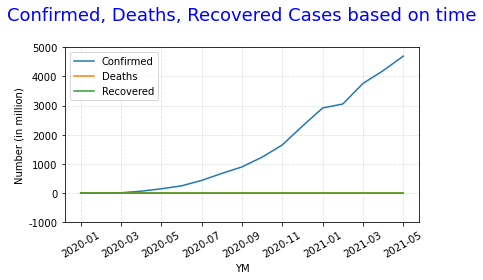

In [5]:
# template matplotlib
totalgCovK1.plot(kind = "line", x = "YM", y = ["Confirmed", "Deaths","Recovered"])
# judul
plt.title("Confirmed, Deaths, Recovered Cases based on time\n", fontsize = 18, color ="blue")
# label sb x
plt.xlabel("YM")
# label sb y
plt.ylabel("Number (in million)")
# membuat nilai y min
labels, locations = plt.yticks()
plt.ylim(ymin = 0)
# ngatur nilai n jarak di sb y
plt.yticks(labels, (labels/1000000).astype(int))
# grid
plt.grid(color = "darkgray", linestyle = ":",linewidth = 0.5)
# rotasi ticks
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

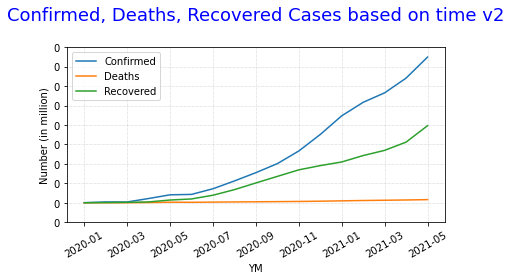

In [6]:
# ver dibersihin
gCovK1v2 = gCovK1v2.astype({"Confirmed":"int","Deaths":"int", "Recovered":"int"})
gCovK1v2["YM"]=pd.DatetimeIndex(gCovK1v2['ObservationDate'])
gCovK1v2['YM'] = gCovK1v2['YM'].apply(lambda x: x.strftime('%Y-%m'))
totalgCovK1v2 = gCovK1v2.groupby("YM")["Confirmed"].mean().reset_index()
totalgCovK1v2["Deaths"] = gCovK1v2.groupby("YM")["Deaths"].mean().reset_index()["Deaths"]
totalgCovK1v2["Recovered"] = gCovK1v2.groupby("YM")["Recovered"].mean().reset_index()["Recovered"]
totalgCovK1v2.plot(kind = "line", x = "YM", y = ["Confirmed", "Deaths","Recovered"])
plt.title("Confirmed, Deaths, Recovered Cases based on time v2\n", fontsize = 18, color ="blue")
plt.xlabel("YM")
plt.ylabel("Number (in million)")
labels, locations = plt.yticks()
plt.ylim(ymin = 0)
plt.yticks(labels, (labels/1000000).astype(int))
#plt.gca().set_xticks(totalgCovK1["YM"].unique())
plt.grid(color = "darkgray", linestyle = ":",linewidth = 0.5)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [7]:
#gCovK1.groupb

<AxesSubplot:xlabel='ObservationDate'>

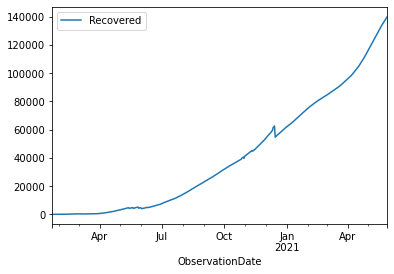

In [8]:
# coba plot pake data per hari
gCovK1["ObservationDate"]=pd.DatetimeIndex(gCovK1["ObservationDate"])
gCovK1.groupby("ObservationDate")["Recovered"].mean().reset_index().plot(kind="line", x = "ObservationDate", y = "Recovered")